In [76]:
#Importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [77]:
#Importing the training dataset 
df_train = pd.read_csv(r"C:\Users\HP\Downloads\train.csv") 
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [79]:
#importing the test data 
df_test = pd.read_csv(r"C:\Users\HP\Downloads\test.csv") 
df_test.head() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [80]:
#Merging the train and test daata

df = pd.concat([df_train, df_test])

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [81]:
#Now we have to work with the categorical columns that can be converted to the numerical  
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [82]:
#Mapping the numerical values in the age column 
df['Age'] = df['Age'].map({'0-17': 1 ,'18-25' :2 , '26-35': 3,'36-45': 4 ,'46-50':5,'51-55' : 6 , '55+' : 7  }) 
df['Age']

0         1
1         1
2         1
3         1
4         7
         ..
233594    3
233595    3
233596    3
233597    5
233598    5
Name: Age, Length: 783667, dtype: int64

In [83]:
#Now we have to work on the Gender Categorical column 
df['Gender'] = df['Gender'].map({'F':0 , 'M':1}) 

In [84]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [85]:
#Now we can look into the City_category column 
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [86]:
df['City_Category']= df['City_Category'].map({'A':1,'B':2,'C':3}) 

In [87]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,2,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,3,15,2,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,3,15,2,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,5,1,3,4+,0,10,16.0,NaN,NaN


In [88]:
#Now we can work on the stay_in_Current_City_Years 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','') 

In [89]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,3,4,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,2,4,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,3,15,2,4,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,3,15,2,4,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,5,1,3,4,0,10,16.0,NaN,NaN


In [90]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [91]:
#Now convert the Stay_In_Current_City_Years to numeric column 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int) 

In [92]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [93]:
#Now we can look into the numerical columns 
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [95]:
#Now we have to handle that null values in the  product_category_2,and product_category_3 
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [96]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [97]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_2'].mode()[0]) 

In [98]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [103]:
#Dropping the columns 'User_ID' and 'Product_ID'
df.drop('User_ID',axis=1,inplace=True) 
df.drop('Product_ID', axis =1,inplace=True)

In [104]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,8.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,8.0,1422.0
3,0,1,10,1,2,0,12,14.0,8.0,1057.0
4,1,7,16,3,4,0,8,8.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,2,4,1,8,8.0,8.0,NaN
233595,0,3,15,2,4,1,5,8.0,8.0,NaN
233596,0,3,15,2,4,1,1,5.0,12.0,NaN
233597,0,5,1,3,4,0,10,16.0,8.0,NaN


In [105]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Purchase'>

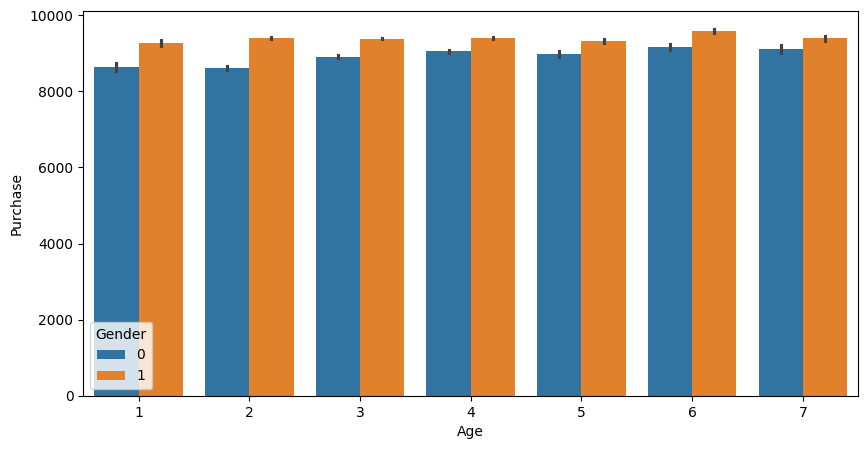

In [109]:
#Now we can do some vizulaizations to under stand the data more deeply 

# It is the graph Age vs Purchase
plt.figure(figsize=(10,5)) 
sns.barplot(x='Age',y='Purchase',hue='Gender',data =df) 

Here the observation is that male are spending the more money over the female

<Axes: xlabel='Occupation', ylabel='Purchase'>

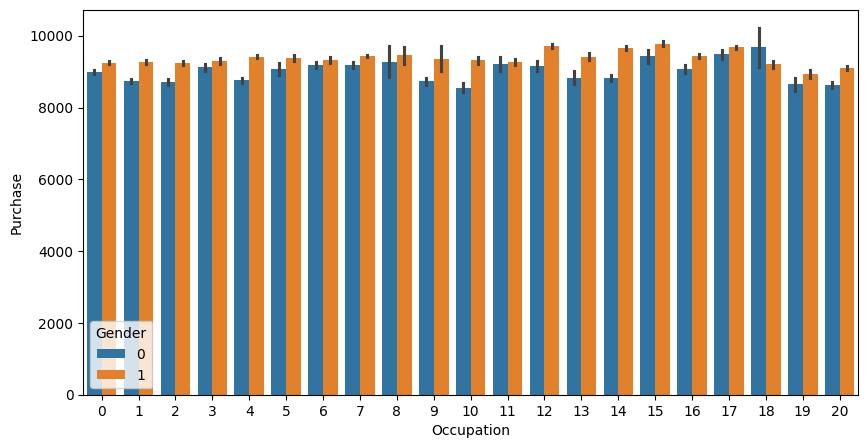

In [110]:
# Now we can look into the occupation vs purchase 
plt.figure(figsize=(10,5)) 
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df) 

Here the observation that the occupation has a uniform effect on the purchase

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

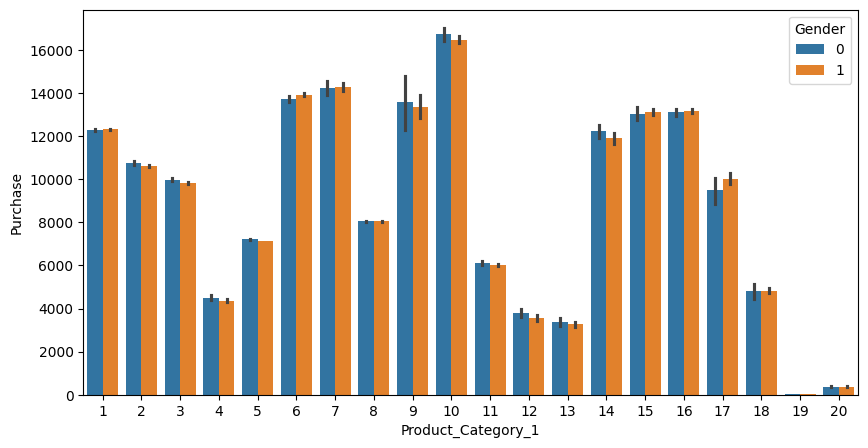

In [111]:
#Now we can look into the product category column 
plt.figure(figsize=(10,5)) 
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df) 

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

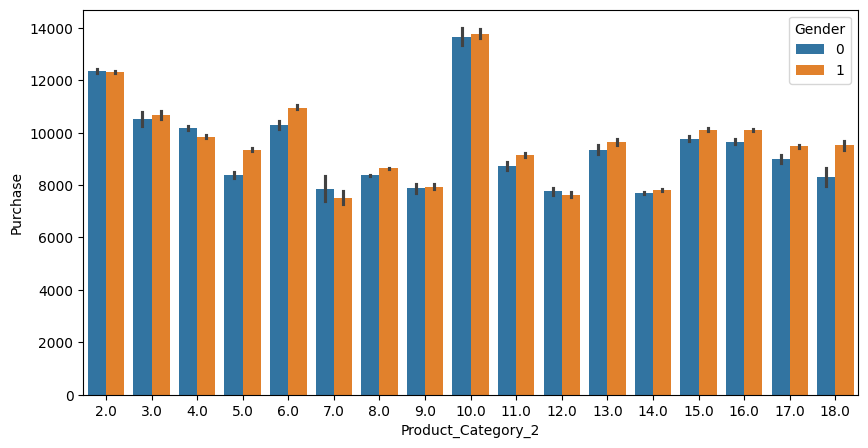

In [112]:
plt.figure(figsize=(10,5)) 
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data =df) 

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

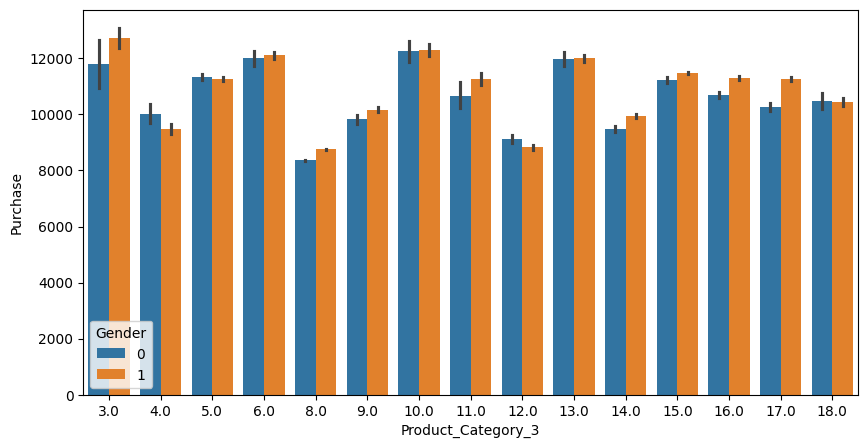

In [113]:
plt.figure(figsize=(10,5)) 
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

Here the observation is that product_category_1 has the highest purchase count compared to the product_category_2 and product_category_3